In [100]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
mpl.rc("savefig", dpi=200)


data = pd.read_csv('../data/yeast.csv', header=None).values
df_all = pd.read_csv('../data/fittedVals.csv',index_col=0)


df_labels = df_all.columns
df_labels = list(map(lambda s: s.replace("_ct_bin",""), df_all.columns))
df_labels = list(map(lambda s: s.replace("_mode",""), df_labels))
df_all.columns = df_labels

df_all=df_all[['hairtype','service','ethnicity','breastappearance',
               'build','haircolor','fellatio','intercoursevaginal',
               'kissing','cunninlingus','massage','manualpenilestimulation',
               'manualvaginalstimulation','testiclestimulation','cuddling',
               'ejaculationonbody','intercourseanal','analoral','manualanalstimulation',
               'threesome','sm']]





data = df_all.values
from kmeans.utilities import generate_random_subset
data = generate_random_subset(data,10000)[1]

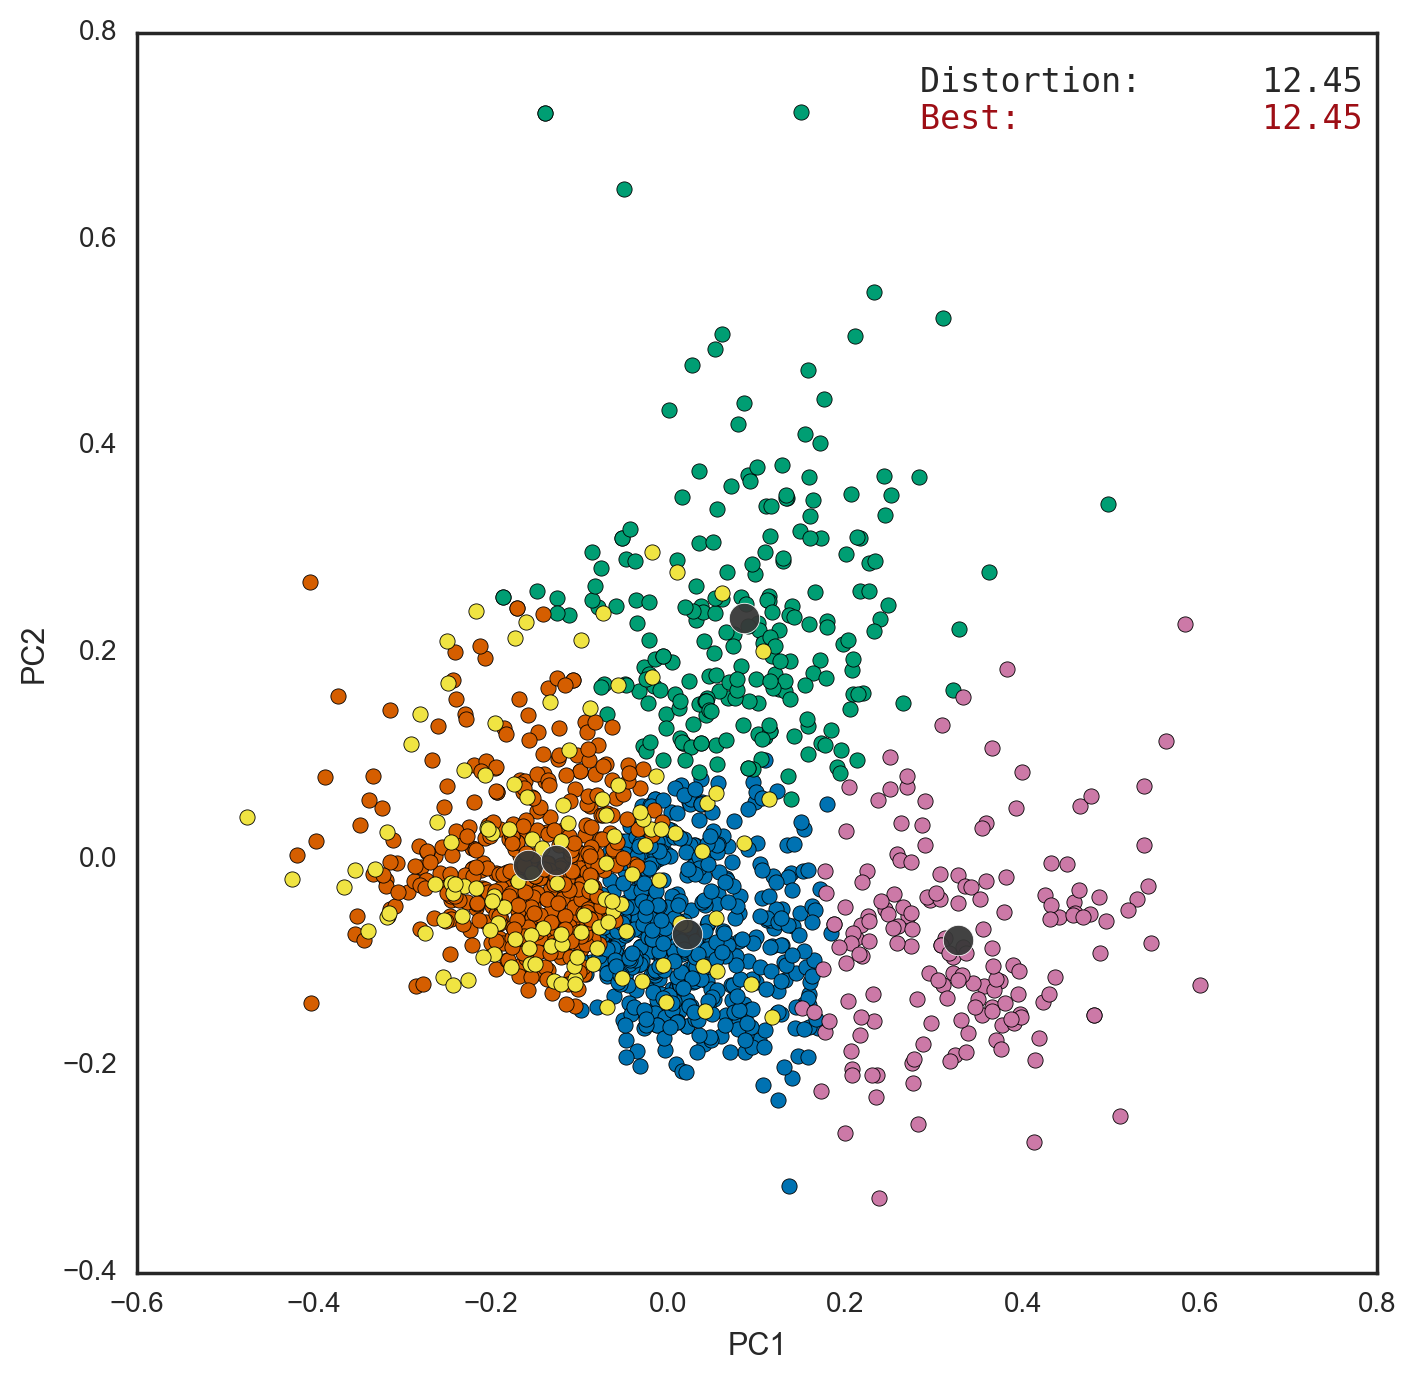

In [83]:
from kmeans.utilities import distortion, kmeans_plot
from kmeans.kmeans_stock import kmeans_stock

centers,labels,timing=kmeans_stock(data=data, n_clusters=5)

kmeans_plot(labels,
            centers,
            data,
            print_distortion=12.445, print_best=12.445)

In [7]:
#basic c-style k-means algorithm

K=3
N,D=data.shape

A = np.zeros((K,D))
W = np.zeros(N,dtype=np.int)
X = data
m = np.zeros(K)

#randomization where we make sure there are points in every cluster
    
def shuffle(x,n):
    for i in range(n-2,-1,-1): #from n-2 to 0
        j= np.random.randint(0,i+1) #from 0<=j<=i
        temp = x[j]
        x[j] = x[i]
        x[i] = temp

best = np.inf
r=0        
for R in range(10):
    for n in range(N):
        W[n] = n%K
        
    shuffle(W,len(W))

    converged = False


    while not converged:
        converged = True
    
        #compute means
        for k in range(K):
            for d in range(D):
                A[k,d] = 0
            m[k]=0
            
        for n in range(N):
            for d in range(D):
                A[W[n],d]+=X[n,d]
            m[ W[n] ] +=1
    
        for k in range(K):
            for d in range(D):
                A[k,d] = A[k,d]/m[k]
                
                
        temp = distortion(W,A,X)
        if temp < best: best = temp
                    
        fig = kmeans_plot(W,A,X,print_distortion=temp,print_best=best);
    
        for b in range(2):
            r=r+1
            fig.savefig('image%d.jpg'%r,dpi=300)
            plt.close(fig)
            
        #assign to closest mean
        for n in range(N):
        
            min_val = np.inf
            min_ind = -1
        
            for k in range(K):
                temp =0
                for d in range(D):
                    temp += (X[n,d]-A[k,d])**2
            
                if temp < min_val:
                    min_val = temp
                    min_ind = k
                
            if min_ind != W[n]:
                W[n] = min_ind
                converged=False
                
        temp = distortion(W,A,X)
        if temp < best: best = temp
        fig = kmeans_plot(W,A,X,print_distortion=temp,print_best=best);
        
        for b in range(2):
            r=r+1
            fig.savefig('image%d.jpg'%r,dpi=300)
            plt.close(fig)

In [3]:
def generate_initial_assignment(N,K):
    W = np.empty(N,dtype=np.int)
    for k in range(N): W[k] = k%K
    np.random.shuffle(W)
    return W


def compute_means(labels, centers, data, sum_values=False):
    N,D=data.shape
    K,D=centers.shape

    for k in range(K):
        if sum_values==False:
            centers[k,:] = np.mean(data[labels==k],axis=0)
        else:
            centers[k,:] = np.sum(data[labels==k],axis=0)


    return centers

def reassign_labels(labels,centers,data):
    old_labels = labels.copy()

    def minimize(x):
        return np.argmin(np.sum((centers-x)**2,axis=1)) #finds closest cluster

    labels[:] = np.apply_along_axis(minimize,1,data)

    return np.array_equal(labels,old_labels)

def kmeans_sequential(data, n_clusters,max_iter=100):

    start = time.time()

    n_data, n_dimensions = data.shape
    centers = np.zeros((n_clusters,n_dimensions))
    labels = generate_initial_assignment(n_data,n_clusters)

    for k in range(max_iter):
        compute_means(labels,centers,data)
        converged = reassign_labels(labels,centers,data)
        if converged: break

    timing = time.time()-start

    return centers, labels, timing

In [101]:
import time
from sklearn.cluster import KMeans

start = time.time()
stock = KMeans(n_clusters=3,n_init=100,max_iter=100)
stock.fit(data)
timing = time.time()-start
print(timing)
centers, labels = stock.cluster_centers_,stock.labels_

print(stock.inertia_)

1.857874870300293
94117.2166147


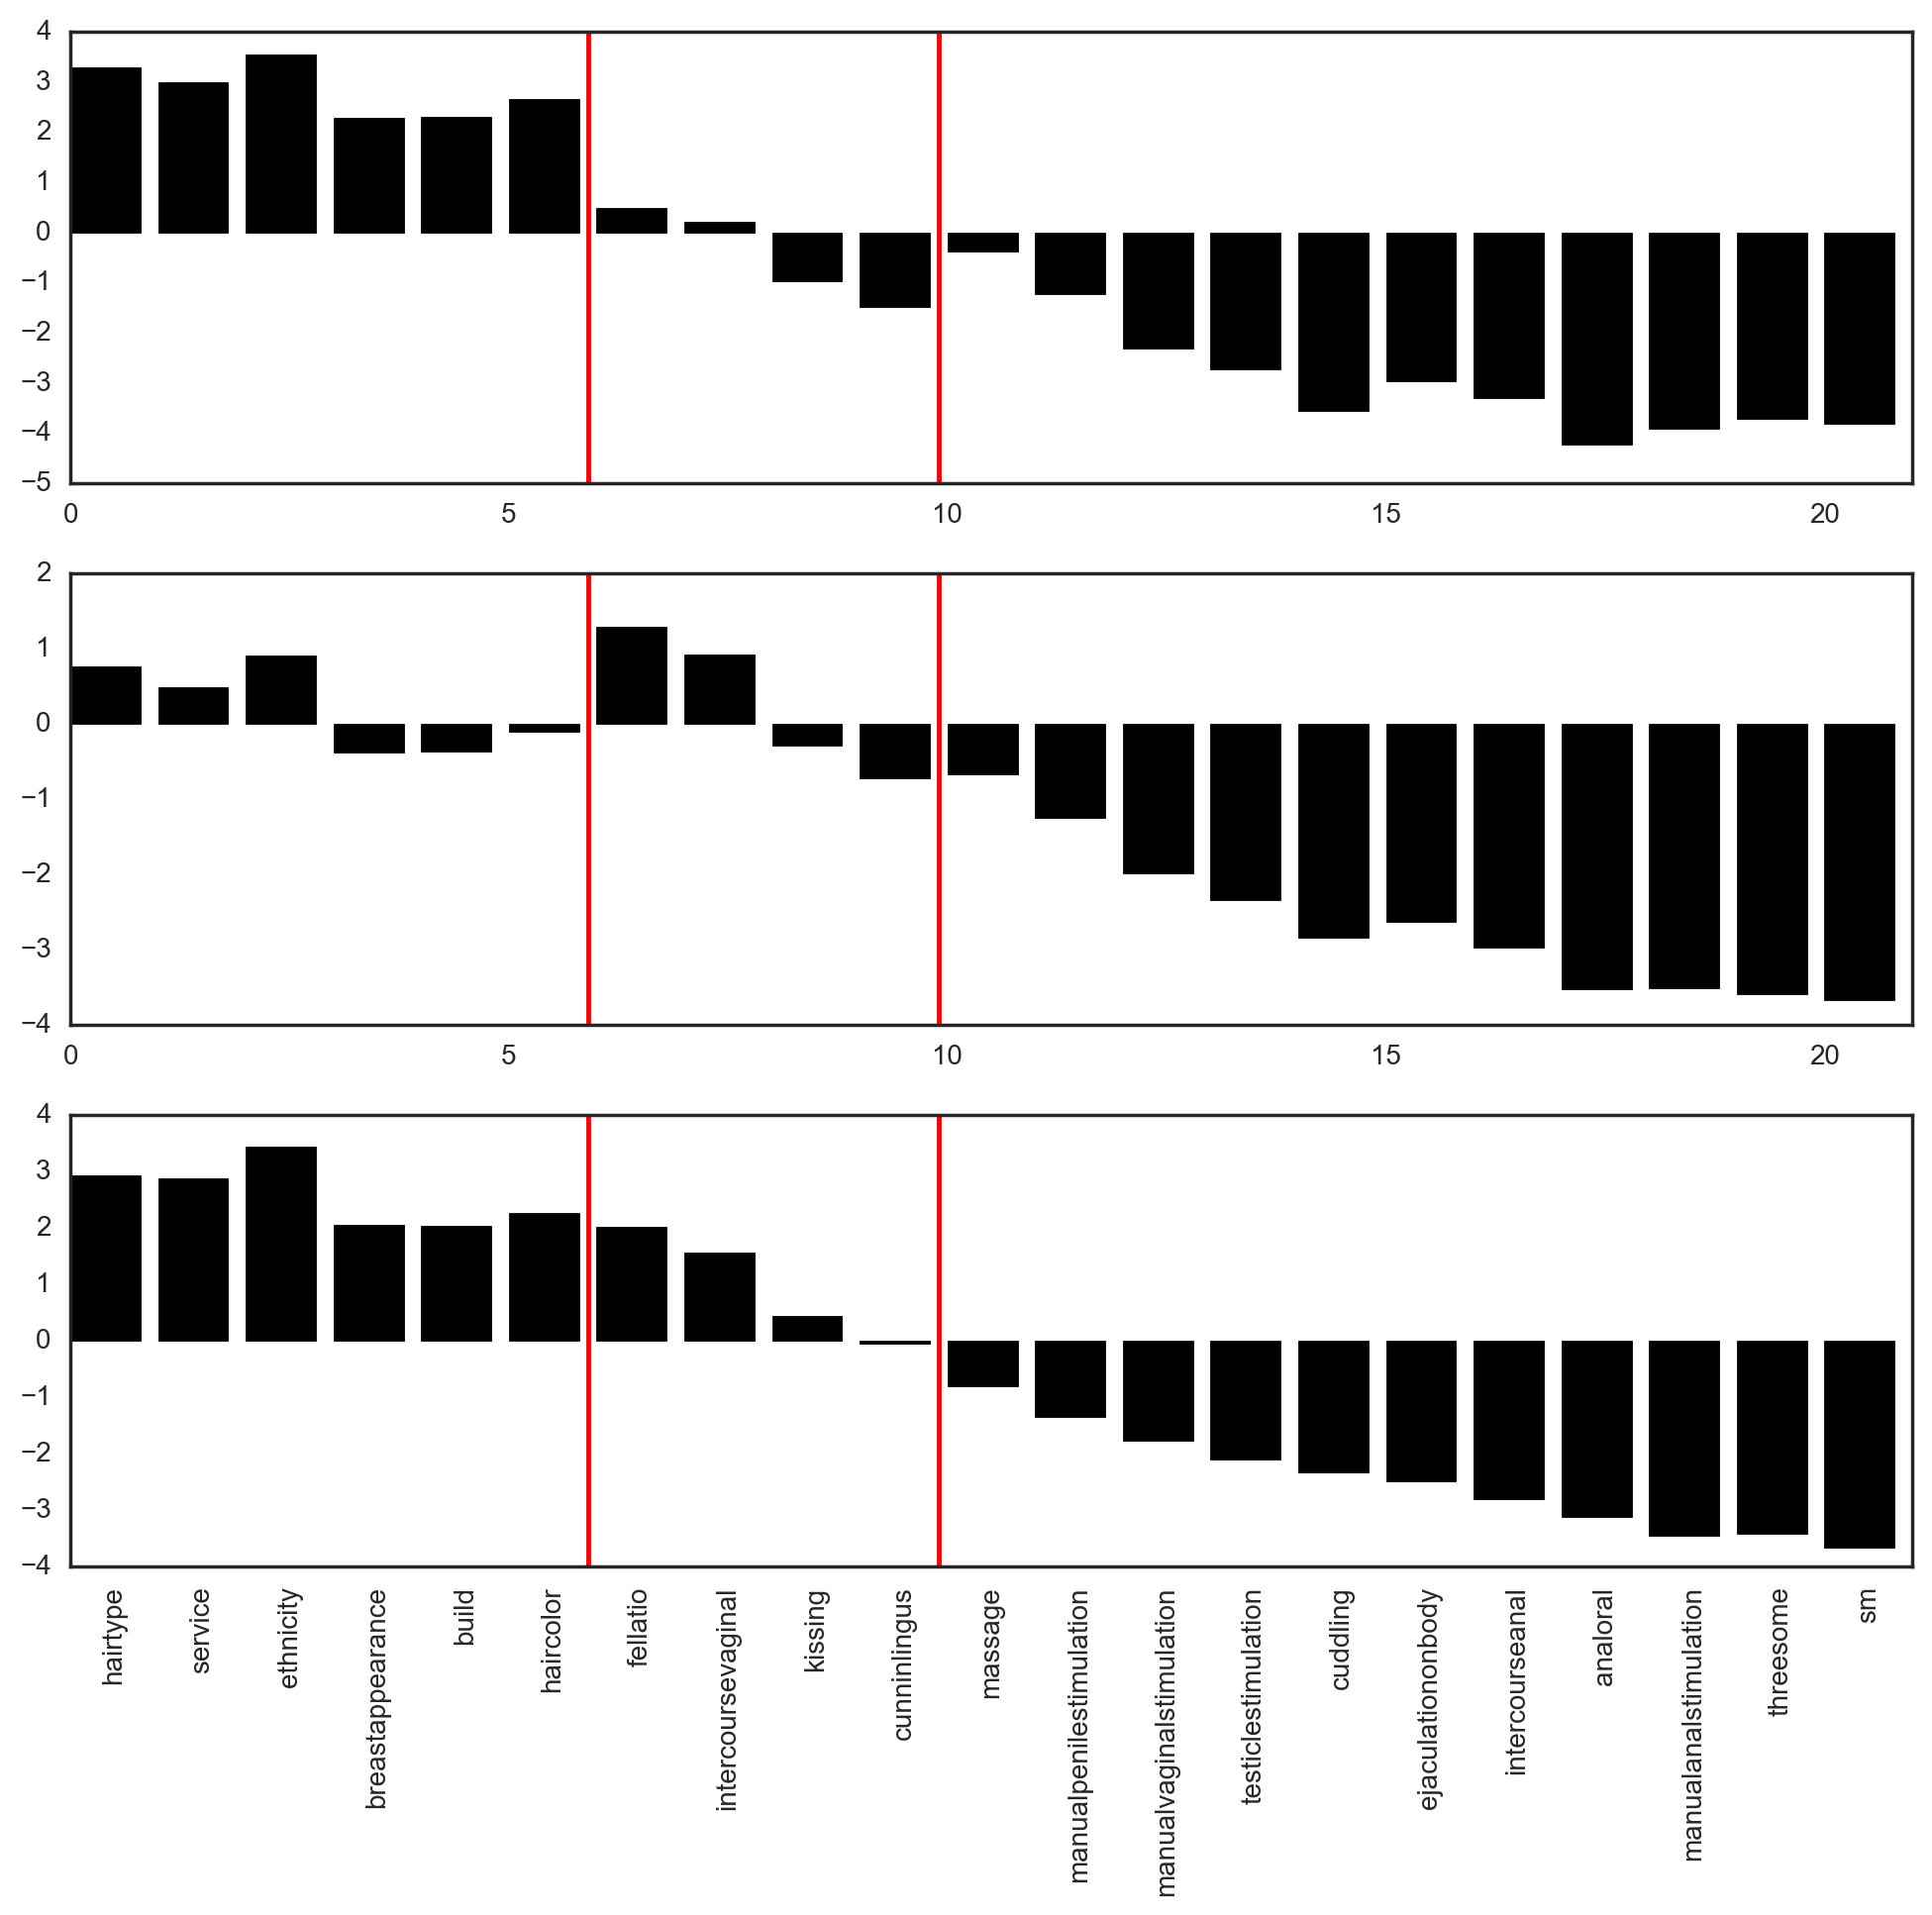

In [116]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)

#cntrs = np.exp(centers)/(1 + np.exp(centers)  )
cntrs = centers

plt.bar(range(len(cntrs[0])), cntrs[0],color='black')
plt.axvline(x=5.9, ymin=0, ymax=1, color='red')
plt.axvline(x=9.9, ymin=0, ymax=1, color='red')

plt.xlim(0,21)
plt.subplot(3,1,2)
plt.bar(range(len(cntrs[1])), cntrs[1],color='black')
plt.axvline(x=5.9, ymin=0, ymax=1, color='red')
plt.axvline(x=9.9, ymin=0, ymax=1, color='red')
plt.xlim(0,21)
ax = plt.subplot(3,1,3)
plt.bar(np.arange(len(cntrs[2])), cntrs[2],color='black')
plt.axvline(x=5.9, ymin=0, ymax=1, color='red')
plt.axvline(x=9.9, ymin=0, ymax=1, color='red')
plt.xlim(0,21)

plt.xticks(np.arange(len(cntrs[2]))+0.5,df_all.columns)

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()